# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

### Q1.1

In [3]:
import pandas as pd

df = pd.read_csv("./data/airbnb_hw.csv")

var = 'Price' # We'll clean the Price variable
print('Before coercion: \n', df[var].describe(),'\n') # The Price variable is not read by Pandas as a number

df['Price'] = pd.to_numeric(df['Price'], errors='coerce') # Coerce the variable to numeric

# Create a missing dummy:
df['Price_nan'] = df['Price'].isnull() # Equals 1 if missing, 0 if non-null

# After coercion:
print('After coercion: \n', df['Price'].describe(),'\n') # Describe the numeric variable
print('Total Missings: \n', sum(df['Price_nan']),'\n') # How many missing values are there?

Before coercion: 
 count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object 

After coercion: 
 count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64 

Total Missings: 
 181 



### Q1.2

In [6]:
import numpy as np

df2 = pd.read_csv("./data/mn_police_use_of_force.csv")
var2 = 'subject_injury'


print(df2[var2].unique(), '\n') # A Categorical Example
df2[var2] = df2[var2].replace(' ',np.nan) # Notice the column replacement
print(df2[var2].value_counts(), '\n')

print(df2[var2].describe(),'\n') # Describe the numeric variable
df2['subject_injury_NA'] = df2[var2].isnull() # Create a bond missing dummy; long tail
print(f'Percent Missing: {(sum(df2['subject_injury_NA']))/len(df2)*100}\n') # How many missing values are there?
print(pd.crosstab(df2['subject_injury_NA'],df2['force_type'])) # Bingo

#This is very concerning, as the missing values correspond to more aggressive use of force. For example, there is no data supporting the relationahip between injury and use of firearm



[nan 'No' 'Yes'] 

subject_injury
Yes    1631
No     1446
Name: count, dtype: int64 

count     3077
unique       2
top        Yes
freq      1631
Name: subject_injury, dtype: object 

Percent Missing: 76.19342359767892

force_type         Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury_NA                                                    
False                  2          2379                172        2   
True                   2          7051               1421        0   

force_type         Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury_NA                                                      
False                             77                 74            0   
True                              27                 74           87   

force_type         Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury_NA                                                        
False                                   3                     

### Q1.3

In [9]:
df3 = pd.read_parquet('./data/justice_data.parquet')

df3 = df3.rename(columns = {'BondAmountAtInitialContact':'bond',
                    'Defendant_IndigencyStatus':'is_poor',
                    'CaseType_MostSerChargeinContactEvent_regardlessofFinalDisp':'case_type',
                    'WhetherDefendantWasReleasedPretrial':'released'}) # Rename variables

var3 = 'released'
print(df3[var3].unique(), '\n') # A Categorical Example
df3[var3] = df3[var3].replace(' ',np.nan) # Notice the column replacement
print(df3[var3].value_counts(), '\n')

#Unsure how to clean this further

[9 0 1] 

released
1    19154
0     3801
9       31
Name: count, dtype: int64 



### Q1.4

In [12]:
df4=pd.read_parquet('./data/justice_data.parquet')
df4=df4.rename(columns = {'ImposedSentenceAllChargeInContactEvent':'imposed'})
var4 = 'imposed'
#print(df4[var4].unique(), '\n') # A Categorical Example
df4[var4] = df4[var4].replace(' ',np.nan) # Notice the column replacement
print(df4[var4].value_counts(), '\n')

imposed
0                   4953
12                  1404
.985626283367556    1051
6                    809
3                    787
                    ... 
49.9712525667351       1
57.0349075975359       1
79.9260780287474       1
42.1642710472279       1
1.6570841889117        1
Name: count, Length: 483, dtype: int64 



**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

### Q2.1, Q2.2, & Q2.3

In [16]:
conda install -c anaconda xlrd


Channels:
 - anaconda
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


Range of 'Year' column (excluding zero): 5 - 2026
Year
1940    24
1941    27
1942    41
1943    28
1944    31
dtype: int64


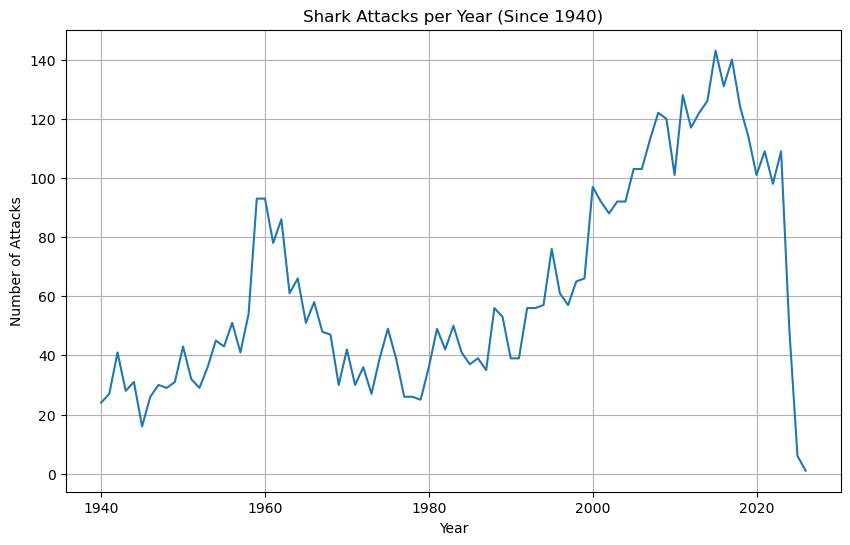

In [199]:
df_shark = pd.read_excel("./data/GSAF5 (1).xls",engine="xlrd")
df_shark = df_shark.dropna(axis=1, how='all')
df_shark['Year'] = pd.to_numeric(df_shark['Year'], errors='coerce')
df_shark['Year'] = df_shark['Year'].fillna(0).astype(int) # changing year to integer and ignoring if non-value
df_shark_non_zero = df_shark[df_shark['Year'] > 0]
print(f"Range of 'Year' column (excluding zero): {df_shark_non_zero['Year'].min()} - {df_shark_non_zero['Year'].max()}")
df_shark_filtered = df_shark[df_shark['Year'] >= 1940]
df_shark_filtered.head()


import matplotlib.pyplot as plt

# Plotting attacks per year
attacks_per_year = df_shark_filtered.groupby('Year').size()
print(attacks_per_year.head())
attacks_per_year.plot(kind='line', figsize=(10, 6))
plt.title("Shark Attacks per Year (Since 1940)")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.grid(True)
plt.show()

# The number of shark attacks is increasing followed by a sharp decrease

### Q2.4 & Q2.5

Proportion Male: 0.8752533915484173


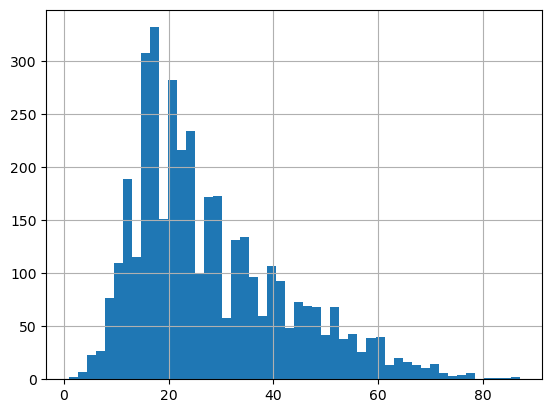

In [202]:
var5='Age'
df_shark[var5] = df_shark[var5].replace(' ',np.nan) # Notice the column replacement
df_shark[var5] = pd.to_numeric(df_shark[var5], errors='coerce')
df_shark[var5].hist(bins=50)

proportion_m = df_shark['Sex'].value_counts(normalize=True)['M']
print(f'Proportion Male: {proportion_m}')


### Q2.6

In [205]:
df_shark['Type'] = df_shark['Type'].str.strip().str.capitalize()  # Remove leading/trailing spaces and capitalize

df_shark['Type'] = df_shark['Type'].replace(['Unkown', 'Unkown Attack', 'Unknown Attack'], 'Unknown')

df_shark['Type'] = df_shark['Type'].apply(lambda x: x if x in ['Provoked', 'Unprovoked', 'Unknown'] else 'Unknown') # Ensure only three categories: 'Provoked', 'Unprovoked', and 'Unknown'

proportion_unprovoked = df_shark['Type'].value_counts(normalize=True)['Unprovoked']

print(f"Proportion of Unprovoked attacks: {proportion_unprovoked}")

df_shark.head()

Proportion of Unprovoked attacks: 0.7369851258581236


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12.0,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37.0,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23.0,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40.0,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28.0,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Q2.7

In [208]:
df_shark['Fatal Y/N'] = df_shark['Fatal Y/N'].str.strip().str.upper()  # Remove spaces and convert to uppercase

df_shark['Fatal Y/N'] = df_shark['Fatal Y/N'].replace(['Unknown Fatality', 'Fatalities', 'Unknown'], 'Unknown') # Replace any unexpected values with 'Unknown' 

df_shark['Fatal Y/N'] = df_shark['Fatal Y/N'].apply(lambda x: x if x in ['Y', 'N', 'Unknown'] else 'Unknown')

print(df_shark['Fatal Y/N'].value_counts())


Fatal Y/N
N          4881
Y          1469
Unknown     642
Name: count, dtype: int64


### Q2.8

In [211]:
# Cross-tabulation of attack type vs. gender
attack_by_gender_and_type = pd.crosstab(df_shark['Type'], df_shark['Sex'])

# Calculate the proportion of unprovoked attacks on men and women
unprovoked_proportion = attack_by_gender_and_type.loc['Unprovoked'] / attack_by_gender_and_type.sum(axis=1)

print(unprovoked_proportion)

# I in fact hate sharks they are the most terrifying thing ever.


 M           NaN
.            NaN
F            NaN
M            NaN
M            NaN
M x 2        NaN
N            NaN
Provoked     NaN
Unknown      NaN
Unprovoked   NaN
lli          NaN
dtype: float64


### Q2.9

In [214]:
df_shark.head()


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12.0,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37.0,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23.0,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40.0,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28.0,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
# Split the 'Species' column and check if it contains "white" or "White Shark"
df_shark=df_shark.rename(columns = {'Species ':'Species'})

count=0
for i in df_shark['Species']:
    if isinstance(i, str) and 'White' in i:
        count+=1
    elif isinstance(i, str) and 'white' in i: 
        count+=1
print(count)

print(f'Proportion: {count/len(df_shark)}')

746
Proportion: 0.1066933638443936


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

In [5]:
# 1. The paper focuses on tidy data, a structured approach to organizing datasets to make data cleaning, manipulation, and analysis easier. It defines a specific structure for tidy data, where each variable is a column, each observation is a row, and each type of observational unit is a table. The paper also introduces tools for tidying messy datasets and discusses how a consistent data structure simplifies data analysis.
# 2. The tidy data standard is designed to make data cleaning and analysis easier by providing a consistent way to structure data. It helps analysts avoid repetitive data reformatting when moving between tools, thus allowing them to focus on actual analysis rather than logistics. The standard also facilitates the development of tools that input and output tidy datasets, improving workflow efficiency.
# 3. "Like families, tidy datasets are all alike but every messy dataset is messy in its own way."
#This is a reference to Tolstoy’s quote about families. It means that tidy datasets follow a consistent and predictable structure, making them easier to work with. In contrast, messy datasets can be disorganized in countless ways, requiring different approaches to clean and structure them.
#"For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
#This means that while it's often intuitive to identify variables and observations in a specific dataset, there isn't a universal rule that applies to all datasets. The distinction can be context-dependent. For example, height and weight might clearly be variables in one dataset, but in another case, they might be different values of a more abstract measurement.
# 4. Values: Individual data points, either numbers (quantitative) or strings (qualitative).
# Variables: Collections of values that measure the same characteristic across different units (e.g., height, temperature).
# Observations: Collections of values that belong to the same unit of analysis (e.g., all measurements taken on a single person or at a specific time).
# 5. A dataset is tidy if:
#Each variable forms a column.
#Each observation forms a row.
#Each type of observational unit forms a table.
#This format ensures that datasets are structured consistently, making analysis easier.
# 6. Column headers are values, not variable names.
#Multiple variables are stored in one column.
#Variables are stored in both rows and columns.
#Multiple types of observational units are stored in the same table.
#A single observational unit is spread across multiple tables.
#Why are the data in Table 4 messy?
#Table 4 is messy because it uses column headers as values instead of variable names. Specifically, income levels are used as column names rather than as values in a properly structured variable column.
#What is "melting" a dataset?
#Melting is the process of transforming a wide-format dataset (where values are spread across multiple columns) into a long-format dataset. This means turning column headers into values of a new variable, making the dataset easier to analyze.
# 7. Table 11 is messy because it stores different variables (days of the month) across columns and another variable (temperature type) in rows. The structure makes it difficult to analyze data efficiently.
#Table 12 is tidy because it restructures the dataset so that each row represents a single observation (a day's temperature), with separate columns for each variable. This makes it easier to manipulate and analyze.
#Table 12 is "molten" because the previous columns (days) have been transformed into a single variable, allowing for a more standardized format.
# 8. The usefulness of tidy data depends on the availability of tools that work well with it, and the development of tidy tools depends on the widespread adoption of tidy data. This creates a cycle where progress in one area depends on progress in the other, making it difficult to advance both independently.
#What does Wickham hope happens in the future with further work on data wrangling?
#Wickham hopes that:
#More research will refine the principles of tidy data.
#New tools will make it easier to tidy and work with data.
#Alternative formulations of tidiness, such as working with high-dimensional arrays, will be explored.
#Cognitive science and human-computer interaction research will contribute to better data design and usability.
#Let me know if you need any clarifications!

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal 
government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?